In [1]:
from google.colab import files
from google.colab import drive

files.upload()
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/*
drive.mount('/content/gdrive')

Saving kaggle.json to kaggle.json
Mounted at /content/gdrive


In [4]:
cd gdrive/MyDrive/Colab\ Notebooks/

[Errno 2] No such file or directory: 'gdrive/MyDrive/Colab Notebooks/'
/content/gdrive/MyDrive/Colab Notebooks


In [5]:
!mkdir titanic_data

In [6]:
cd titanic_data

/content/gdrive/MyDrive/Colab Notebooks/titanic_data


In [7]:
!kaggle competitions download -c titanic

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 5.38MB/s]


In [9]:
ls

gender_submission.csv  test.csv  train.csv


In [33]:
import pandas as pd
import numpy as np
from tensorflow.keras.utils import to_categorical

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test.csv')

data_train_np = np.zeros([data_train.shape[0],8])

cnt = 0
sex_num = np.zeros(data_train_np.shape[0])
sex_num[np.array(data_train['Sex']=='femail')] = 1

data_train_np[:,0:2] = to_categorical(sex_num)
data_train_np[:,2:5] = to_categorical(data_train['Pclass'].to_numpy()-1)

data_train_np[:,5] = data_train['Age']/80
data_train_np[:,6] = data_train['SibSp']/10
data_train_np[:,7] = data_train['Parch']/10

data_train_np[np.isnan(data_train_np)] = 30/80

data_train_np_y = to_categorical(data_train['Survived'])

In [37]:
data_test_np = np.zeros([data_test.shape[0],8])

cnt = 0
sex_num = np.zeros(data_test_np.shape[0])
sex_num[np.array(data_test['Sex']=='femail')] = 1

data_test_np[:,0:2] = to_categorical(sex_num)
data_test_np[:,2:5] = to_categorical(data_test['Pclass'].to_numpy()-1)

data_test_np[:,5] = data_test['Age']/80
data_test_np[:,6] = data_test['SibSp']/10
data_test_np[:,7] = data_test['Parch']/10

data_test_np[np.isnan(data_test_np)] = 30/80

In [38]:
from keras.models import Sequential
from keras import layers
from keras import optimizers

In [40]:
model = Sequential()
model.add(layers.Dense(units=8, activation='relu'))
model.add(layers.Dense(units=16, activation='relu'))
model.add(layers.Dense(units=32, activation='relu'))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=2, activation='softmax'))

In [51]:
model.compile(loss='categorical_crossentropy', optimizer = optimizers.RMSprop(lr=0.001), metrics=['accuracy'])

/usr/local/lib/python3.9/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [52]:
hist = model.fit(data_train_np, data_train_np_y, epochs=400, batch_size=128, validation_split=0.3)

Epoch 1/400
5/5 [==============================] - 1s 62ms/step - loss: 0.5880 - accuracy: 0.6998 - val_loss: 0.5504 - val_accuracy: 0.7201
Epoch 2/400
5/5 [==============================] - 0s 16ms/step - loss: 0.5901 - accuracy: 0.6838 - val_loss: 0.5370 - val_accuracy: 0.7313
Epoch 3/400
5/5 [==============================] - 0s 12ms/step - loss: 0.5829 - accuracy: 0.6982 - val_loss: 0.5380 - val_accuracy: 0.7388
Epoch 4/400
5/5 [==============================] - 0s 12ms/step - loss: 0.5824 - accuracy: 0.6950 - val_loss: 0.5377 - val_accuracy: 0.7388
Epoch 5/400
5/5 [==============================] - 0s 15ms/step - loss: 0.5870 - accuracy: 0.6902 - val_loss: 0.5410 - val_accuracy: 0.7313
Epoch 6/400
5/5 [==============================] - 0s 12ms/step - loss: 0.5858 - accuracy: 0.6982 - val_loss: 0.5369 - val_accuracy: 0.7500
Epoch 7/400
5/5 [==============================] - 0s 12ms/step - loss: 0.5902 - accuracy: 0.6950 - val_loss: 0.5345 - val_accuracy: 0.7425
Epoch 8/400
5/5 [===

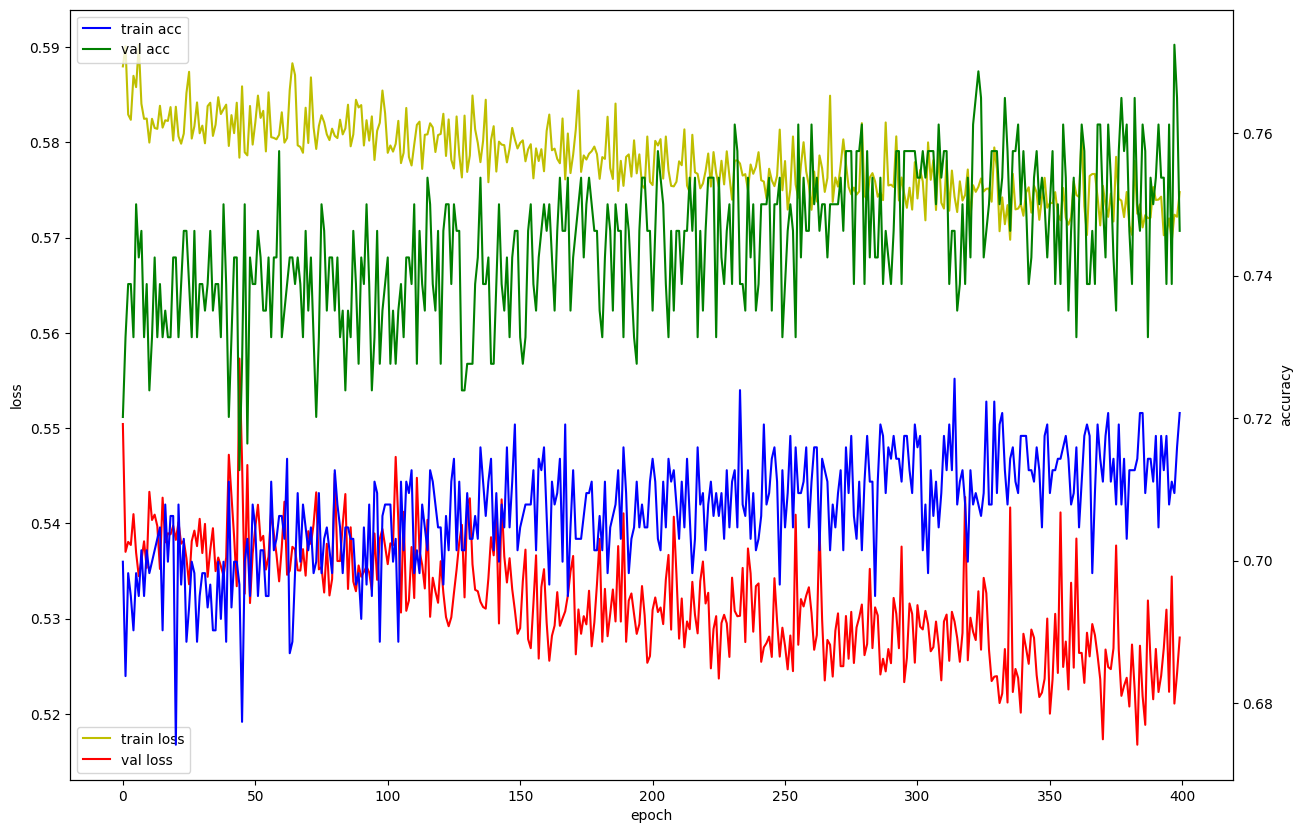

In [53]:
import matplotlib.pyplot as plt

def drawHistory(hist):
  fig = plt.figure(figsize=(15,10))   # 10x15 크개의 figure 생성
  loss_ax = plt.gca()                 # firgure의 기본 축 가져오기
  acc_ax = loss_ax.twinx()            # 축을 1개 더 추가

  loss_ax.plot(hist.history['loss'], 'y', label='train loss')
  loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
  loss_ax.set_xlabel('epoch')
  loss_ax.set_ylabel('loss')
  loss_ax.legend(loc='lower left')

  acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
  acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')
  acc_ax.set_ylabel('accuracy')
  acc_ax.legend(loc='upper left')

  plt.show()

drawHistory(hist)

In [54]:
o = model.predict(data_test_np)

14/14 [==============================] - 0s 2ms/step


In [55]:
o = np.argmax(o,-1)

In [57]:
answer = np.zeros([418,2])
answer[:,0] = data_test['PassengerId']
answer[:,1] = o

In [58]:
df_answer = pd.DataFrame(answer)
df_answer.columns =['PassengerID', 'Survived']
df_answer = df_answer.astype('int32')
df_answer.to_csv('test_pridict.csv', index = False)

In [59]:
!kaggle competitions submit -c titanic -f 'test_prdict.csv' -m "Titanic Data Pridict"

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.9/dist-packages/kaggle/cli.py", line 67, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 561, in competition_submit_cli
    submit_result = self.competition_submit(file_name, message,
  File "/usr/local/lib/python3.9/dist-packages/kaggle/api/kaggle_api_extended.py", line 513, in competition_submit
    content_length=os.path.getsize(file_name),
  File "/usr/lib/python3.9/genericpath.py", line 50, in getsize
    return os.stat(filename).st_size
FileNotFoundError: [Errno 2] No such file or directory: 'test_prdict.csv'
